# Simple Linear Regression-Q2

## Build a prediction model for Salary hike

### Step-1 : Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import warnings as warnings
warnings.filterwarnings("ignore")
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf

### Step-2 : Descriptive analysis

### Step-2.1 : Working with Dataset

#### Loading the Dataset

In [2]:
# Salary with respect to Work experience
exp_sal = pd.read_csv("salary_data.csv")

#### Exploring the dataset

In [3]:
# Displaying first ten records
exp_sal.head(10)

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [4]:
# Shape of the data
exp_sal.shape

(30, 2)

In [5]:
# Summary of the data
exp_sal.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [6]:
# Check the data types
exp_sal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


#### Modifying the dataset

In [7]:
# Re-naming the columns
exp_sal=exp_sal.rename(columns={'YearsExperience':'Exp_Yrs','Salary':'Salary'})
exp_sal.head(10)

,Exp_Yrs,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


### Step-2.2 : Handling missing values

In [8]:
# Check for Null values
exp_sal.isnull().sum()

Exp_Yrs    0
Salary     0
dtype: int64

In [9]:
# Check for duplicate values
exp_sal[exp_sal.duplicated()].shape

(0, 2)

In [10]:
exp_sal[exp_sal.duplicated()]

,Exp_Yrs,Salary


In [11]:
# Change the data type to float
exp_sal=exp_sal.astype(float)
exp_sal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Exp_Yrs  30 non-null     float64
 1   Salary   30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


### Step-2.3 : Exploring data using Visualisation

#### Histogram

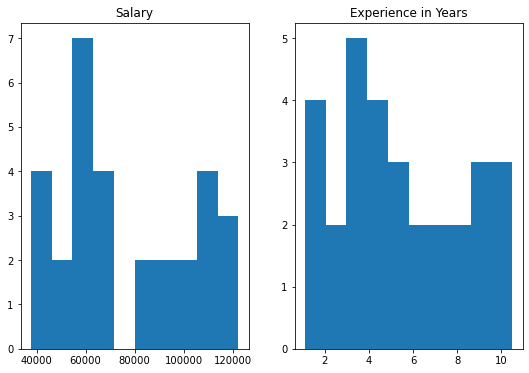

In [12]:
plt.subplots(figsize = (9,6))
plt.subplot(1,2,1)
plt.hist(exp_sal['Salary'])
plt.title('Salary')
plt.subplot(1,2,2)
plt.hist(exp_sal['Exp_Yrs'])
plt.title('Experience in Years')
plt.show()

#### Boxplot

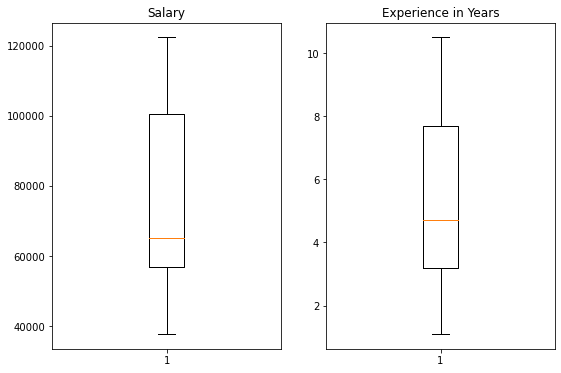

In [13]:
plt.subplots(figsize = (9,6))
plt.subplot(1,2,1)
plt.boxplot(exp_sal['Salary'])
plt.title('Salary')
plt.subplot(1,2,2)
plt.boxplot(exp_sal['Exp_Yrs'])
plt.title('Experience in Years')
plt.show()

#### Distribution plot

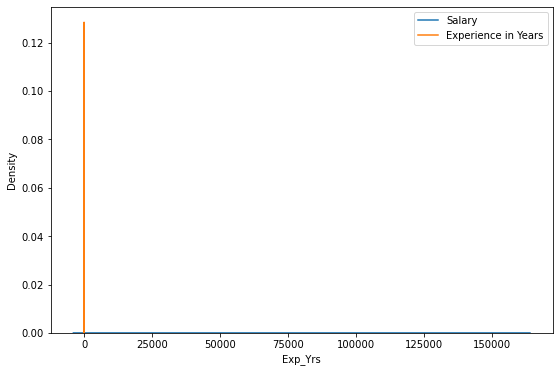

In [14]:
plt.figure(figsize = (9,6))
labels = ['Salary', 'Experience in Years']
sb.distplot(exp_sal['Salary'])
sb.distplot(exp_sal['Exp_Yrs'])
plt.legend(labels)
plt.show()

#### Q-Q plot

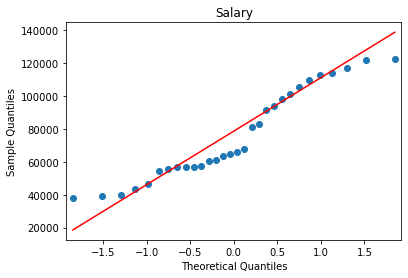

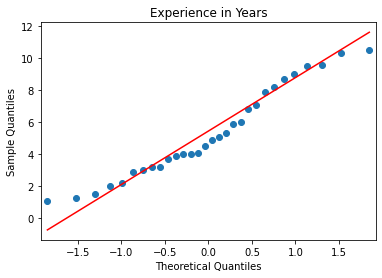

In [15]:
# To check whether the data is following normal distribution
sm.qqplot(exp_sal['Salary'], line = 'q')
plt.title('Salary')
sm.qqplot(exp_sal['Exp_Yrs'], line = 'q')
plt.title('Experience in Years')
plt.show()

#### Correlation and Heat map

In [16]:
# Checking for Correlation between variables
exp_sal.corr()

,Exp_Yrs,Salary
Exp_Yrs,1.000000,0.978242
Salary,0.978242,1.000000


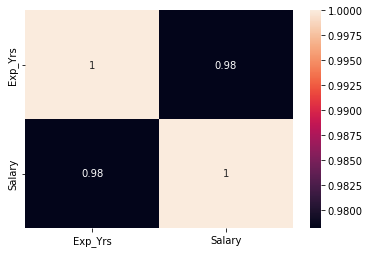

In [17]:
sb.heatmap(exp_sal.corr(),annot=True)
plt.show()

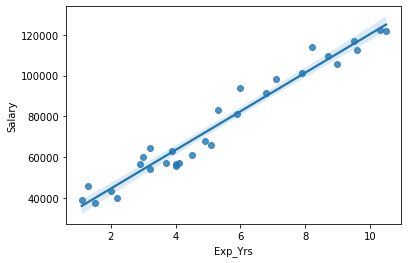

In [18]:
sb.regplot(x=exp_sal['Exp_Yrs'],y=exp_sal['Salary'])
plt.show()

In [19]:
# There is a good correlation between two variables.
# The correlation value is more than 0.8 which represents that the variables are strongly related.

### Step-3 : Build a Simple Linear Regeression model

### Step-3.1 : Fitting the model

In [20]:
# The Simple Linear regression equation is sal=βo+β1(exp).
# Using the following code we build a Simple linear regression model, which predicts the Salary for given Experience in Years
model=smf.ols("Salary~Exp_Yrs",data=exp_sal).fit()

#### Printing Estimated Parameters

In [21]:
# We get values of βo,β1
model.params

Intercept    25792.200199
Exp_Yrs       9449.962321
dtype: float64

### Step-4 : Model Diagnostics

#### Residuals

In [22]:
# Residuals or errors of the model for each observation. Error = Actual value - Predicted value
model.resid

0      3155.841248
1      8127.848783
2     -2236.143681
3     -1167.124842
4     -6691.117306
5      3444.909069
6      6007.912837
7     -1587.079627
8      8412.920373
9     -3568.060788
10      570.946748
11    -7798.049484
12    -6635.049484
13    -7456.045717
14    -7206.030645
15    -4159.015574
16    -7958.008038
17     7210.999498
18     -183.977895
19    11448.025873
20     1686.056015
21     5386.067319
22      855.097462
23    10530.108765
24     1424.127605
25    -5259.861092
26     1402.157748
27    -3876.838485
28     -735.812110
29    -3144.804574
dtype: float64

In [23]:
# Standardised residuals
model.resid_pearson

array([ 0.54520896,  1.40418217, -0.38632031, -0.20163464, -1.15596979,
        0.59514885,  1.03793812, -0.27418681,  1.45343166, -0.61642477,
        0.09863781, -1.34720543, -1.1462834 , -1.28812023, -1.24492716,
       -0.71851921, -1.37484017,  1.24578559, -0.03178436,  1.9777821 ,
        0.29128615,  0.93050694,  0.14772822,  1.81920104,  0.24603492,
       -0.90870332,  0.24223936, -0.66976978, -0.12712026, -0.54330225])

#### Predicted values

In [24]:
pred=model.predict(exp_sal)
pred

0      36187.158752
1      38077.151217
2      39967.143681
3      44692.124842
4      46582.117306
5      53197.090931
6      54142.087163
7      56032.079627
8      56032.079627
9      60757.060788
10     62647.053252
11     63592.049484
12     63592.049484
13     64537.045717
14     68317.030645
15     72097.015574
16     73987.008038
17     75877.000502
18     81546.977895
19     82491.974127
20     90051.943985
21     92886.932681
22    100446.902538
23    103281.891235
24    108006.872395
25    110841.861092
26    115566.842252
27    116511.838485
28    123126.812110
29    125016.804574
dtype: float64

#### Scatter plot

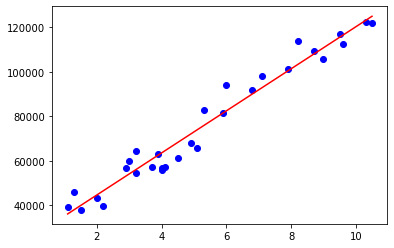

In [25]:
# Scatter plot between Experience-Salary & Experience-Predicted Salary
plt.scatter(exp_sal.Exp_Yrs,exp_sal.Salary,c="b")
plt.plot(exp_sal.Exp_Yrs,pred,"r")
plt.show()

#### Overall Summary

In [26]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Sat, 22 Oct 2022   Prob (F-statistic):           1.14e-20
Time:                        19:59:12   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
Exp_Yrs     9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Root Mean Square Error(RMSE)

In [27]:
rmse = np.sqrt(np.mean(model.resid**2))
rmse

5592.043608760661

#### From the Summary, we can see that the R² value is good. So the accuracy of the model is good.
#### The Root Mean Square Error value is low.
#### However, apply transformations to select the best model.

### Step-5 : Apply Transformations to the model

### Step-5.1 : Log Transformation

In [28]:
# The log transformation Simple linear regression model equation is sal=βo+β1(log(exp)).
model_1 = smf.ols("Salary~np.log(Exp_Yrs)", data=exp_sal).fit()

In [29]:
pred_1 = model_1.predict(exp_sal)
pred_1

0      18795.848339
1      25575.235192
2      31382.551905
3      43057.262306
4      46925.138875
5      58136.050079
6      59511.842441
7      62130.943929
8      62130.943929
9      68022.718504
10     70159.105863
11     71186.552842
12     71186.552842
13     72188.628149
14     75966.422577
15     79422.295729
16     81045.791737
17     82606.829882
18     86959.066704
19     87641.132977
20     92720.502137
21     94472.514696
22     98805.371390
23    100317.918684
24    102719.920751
25    104095.713112
26    106289.868435
27    106714.814600
28    109571.007247
29    110351.454145
dtype: float64

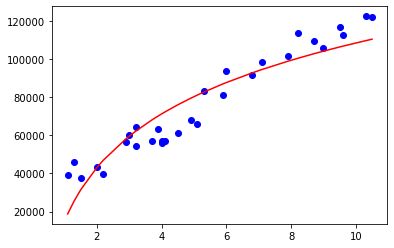

In [30]:
plt.scatter(exp_sal.Exp_Yrs,exp_sal.Salary,c="b")
plt.plot(exp_sal.Exp_Yrs,pred_1,"r")
plt.show()

In [31]:
# Overall Summary
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     163.6
Date:                Sat, 22 Oct 2022   Prob (F-statistic):           3.25e-13
Time:                        19:59:12   Log-Likelihood:                -319.77
No. Observations:                  30   AIC:                             643.5
Df Residuals:                      28   BIC:                             646.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        1.493e+04   5156.226      2.895      0.007    4365.921    2.55e+04
np.log(Exp_Yrs)  4.058e+04   3172.453     12.792      0.000    3.41e+04    4.71e+04
==============================================================================
Omnibus:                        1.094   Durbin-Watson:                   0.512
Prob(Omnibus):                  0.579   Jarque-Bera (JB):                0.908
Skew:                           0.156   Prob(JB):                        0.635
Kurtosis:                       2.207   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [32]:
# Root Mean Square Error(RMSE)
rmse_1 = np.sqrt(np.mean(model_1.resid**2))
rmse_1

10302.893706228308

### Step-5.2 : Exponential Transformation

In [33]:
# The Exponential transformation Simple linear regression model equation is log(sal)=βo+β1(exp).
model_2 = smf.ols("np.log(Salary)~Exp_Yrs", data=exp_sal).fit()

In [34]:
# Convert predicted log values into predicted values
pred_2log = model_2.predict(exp_sal)
pred_2 = np.exp(pred_2log)
pred_2

0      41998.957468
1      43066.066794
2      44160.289228
3      47019.029189
4      48213.688474
5      52639.142472
6      53303.675386
7      54658.014935
8      54658.014935
9      58196.330788
10     59674.982903
11     60428.338456
12     60428.338456
13     61191.204604
14     64340.199291
15     67651.246149
16     69370.128712
17     71132.684635
18     76693.630780
19     77661.835040
20     85860.704208
21     89153.725393
22     98565.809591
23    102346.110512
24    108971.540758
25    113150.933364
26    120475.819601
27    121996.743836
28    133194.621344
29    136578.829694
dtype: float64

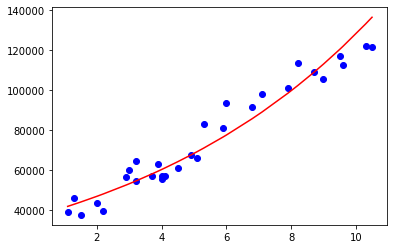

In [35]:
plt.scatter(exp_sal.Exp_Yrs,exp_sal.Salary,c="b")
plt.plot(exp_sal.Exp_Yrs,pred_2,"r")
plt.show()

In [36]:
# Overall Summary
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         np.log(Salary)   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     383.6
Date:                Sat, 22 Oct 2022   Prob (F-statistic):           7.03e-18
Time:                        19:59:12   Log-Likelihood:                 28.183
No. Observations:                  30   AIC:                            -52.37
Df Residuals:                      28   BIC:                            -49.56
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.5074      0.038    273.327      0.000      10.429      10.586
Exp_Yrs        0.1255      0.006     19.585      0.000       0.112       0.139
==============================================================================
Omnibus:                        0.826   Durbin-Watson:                   1.438
Prob(Omnibus):                  0.661   Jarque-Bera (JB):                0.812
Skew:                           0.187   Prob(JB):                        0.666
Kurtosis:                       2.286   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [37]:
# Root Mean Square Error(RMSE)
rmse_2 = np.sqrt(np.mean((exp_sal.Salary-pred_2)**2))
rmse_2

7213.235076620129

### Step-5.3 : Quadratic transformation

In [38]:
model_3 = smf.ols("np.log(Salary)~Exp_Yrs+np.power(Exp_Yrs,2)",data=exp_sal).fit()

In [39]:
# Convert predicted log values into predicted values
pred_3log = model_3.predict(exp_sal)
pred_3 = np.exp(pred_3log)
exp_sal['pred']=pred_3
exp_sal

,Exp_Yrs,Salary,pred
0,1.1,39343.0,38233.559684
1,1.3,46205.0,39686.674746
2,1.5,37731.0,41173.227466
3,2.0,43525.0,45033.440973
4,2.2,39891.0,46633.832589
5,2.9,56642.0,52477.426306
6,3.0,60150.0,53341.747319
7,3.2,54445.0,55091.465477
8,3.2,64445.0,55091.465477
9,3.7,57189.0,59582.917523


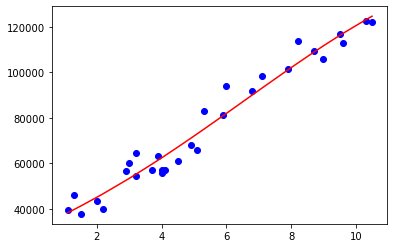

In [40]:
plt.scatter(exp_sal.Exp_Yrs,exp_sal.Salary,c="b")
plt.plot(exp_sal.Exp_Yrs,pred_3,"r")
plt.show()

In [41]:
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         np.log(Salary)   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     249.2
Date:                Sat, 22 Oct 2022   Prob (F-statistic):           3.95e-18
Time:                        19:59:13   Log-Likelihood:                 32.391
No. Observations:                  30   AIC:                            -58.78
Df Residuals:                      27   BIC:                            -54.58
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               10.3369      0.067    154.368      0.000      10.199      10.474
Exp_Yrs                  0.2024      0.027      7.601      0.000       0.148       0.257
np.power(Exp_Yrs, 2)    -0.0066      0.002     -2.957      0.006      -0.011      -0.002
==============================================================================
Omnibus:                        1.099   Durbin-Watson:                   1.845
Prob(Omnibus):                  0.577   Jarque-Bera (JB):                1.002
Skew:                           0.260   Prob(JB):                        0.606
Kurtosis:                       2.271   Cond. No.                         223.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [42]:
# Root Mean Square Error(RMSE)
rmse_3 = np.sqrt(np.mean((exp_sal.Salary-pred_3)**2))
rmse_3

5391.081582693624

### Step-6 : Final Selection of model

In [43]:
results = {"MODEL":pd.Series(["Linear","Logarithmic","Exponential","Quadratic"]),
           "R²_Values":pd.Series([model.rsquared,model_1.rsquared,model_2.rsquared,model_3.rsquared]),
           "RMSE_Values":pd.Series([rmse,rmse_1,rmse_2,rmse_3])
          }
result_table=pd.DataFrame(results)
result_table 

,MODEL,R²_Values,RMSE_Values
0,Linear,0.956957,5592.043609
1,Logarithmic,0.853889,10302.893706
2,Exponential,0.931967,7213.235077
3,Quadratic,0.948611,5391.081583


##### From the above results we can see that the Linear model is having best R² and less RMSE values
##### Hence this model can be selected and used for predicting Salary

### Step-7: Residual Analysis

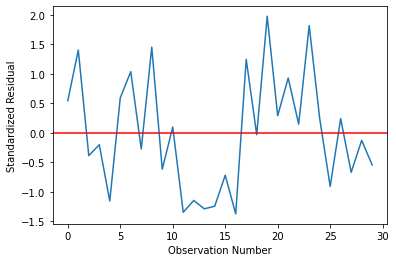

In [44]:
plt.plot(np.arange(len(exp_sal)),model.resid_pearson)
plt.axhline(y=0,color='red')
plt.xlabel("Observation Number")
plt.ylabel("Standardized Residual") 
plt.show()

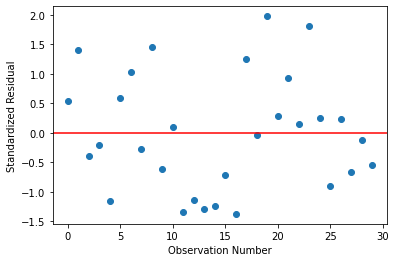

In [45]:
plt.scatter(np.arange(len(exp_sal)),model.resid_pearson)
plt.axhline(y=0,color='red')
plt.xlabel("Observation Number")
plt.ylabel("Standardized Residual")
plt.show()

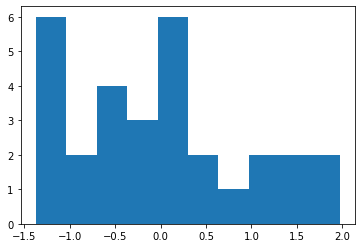

In [46]:
plt.hist(model.resid_pearson)
plt.show()

#### As the residuals show normal distribution and constant variance(approximate), it is a good model.

### Step-8 : Using the model for new data

In [47]:
#Predict for new data(Experience)
newdata=pd.Series([6,10,20])  

In [48]:
data_pred=pd.DataFrame(newdata,columns=['Exp_Yrs'])
data_pred

,Exp_Yrs
0,6
1,10
2,20


In [49]:
# Convert predicted log values into predicted values
pred_4 = model.predict(data_pred)
data_pred['Pred_Salary']=np.round(pred_4,2)
data_pred

,Exp_Yrs,Pred_Salary
0,6,82491.97
1,10,120291.82
2,20,214791.45


#### Hence the Linear Regression model gives accurate predictions